In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("space_missions_dataset.csv")
data.head()

,Mission ID,Mission Name,Launch Date,Target Type,Target Name,Mission Type,Distance from Earth (light-years),Mission Duration (years),Mission Cost (billion USD),Scientific Yield (points),Crew Size,Mission Success (%),Fuel Consumption (tons),Payload Weight (tons),Launch Vehicle
0,MSN-0001,Mission-1,2025-01-01,Star,Titan,Colonization,7.05,5.2,526.68,64.3,21,100.0,731.88,99.78,SLS
1,MSN-0002,Mission-2,2025-01-08,Exoplanet,Betelgeuse,Colonization,41.76,23.0,234.08,84.4,72,89.6,4197.41,45.72,Starship
2,MSN-0003,Mission-3,2025-01-15,Asteroid,Mars,Exploration,49.22,28.8,218.68,98.6,16,98.6,4908.00,36.12,Starship
3,MSN-0004,Mission-4,2025-01-22,Exoplanet,Titan,Colonization,26.33,17.8,232.89,36.0,59,90.0,2569.05,40.67,Starship
4,MSN-0005,Mission-5,2025-01-29,Exoplanet,Proxima b,Mining,8.67,9.2,72.14,96.5,31,73.2,892.76,12.40,Starship


In [3]:
df = data 

In [4]:
df["Mission Success (%)"].skew()

-0.9827550423008707

 #We need to predict the Mission Success rate based on various factors such as mission duration, cost, and other related information.

#Drop columns that are not relevant to predict Mission Success rate

The Mission ID, Mission Name,Target Name, and Launch Date columns are irrelevant and have no use for predicting the Mission Success rate, so they need to be deleted.

In [5]:
df = df.drop(columns=['Mission ID', 'Mission Name', 'Launch Date' , 'Target Name'])

In [6]:
df.head(1)

,Target Type,Mission Type,Distance from Earth (light-years),Mission Duration (years),Mission Cost (billion USD),Scientific Yield (points),Crew Size,Mission Success (%),Fuel Consumption (tons),Payload Weight (tons),Launch Vehicle
0,Star,Colonization,7.05,5.2,526.68,64.3,21,100.0,731.88,99.78,SLS


We will check for null values, remove any duplicates, and verify the data types. After performing these checks, if we find any issues, we will address and resolve them accordingly.

In [7]:
df.isnull().sum()

Target Type                          0
Mission Type                         0
Distance from Earth (light-years)    0
Mission Duration (years)             0
Mission Cost (billion USD)           0
Scientific Yield (points)            0
Crew Size                            0
Mission Success (%)                  0
Fuel Consumption (tons)              0
Payload Weight (tons)                0
Launch Vehicle                       0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Target Type                        500 non-null    object 
 1   Mission Type                       500 non-null    object 
 2   Distance from Earth (light-years)  500 non-null    float64
 3   Mission Duration (years)           500 non-null    float64
 4   Mission Cost (billion USD)         500 non-null    float64
 5   Scientific Yield (points)          500 non-null    float64
 6   Crew Size                          500 non-null    int64  
 7   Mission Success (%)                500 non-null    float64
 8   Fuel Consumption (tons)            500 non-null    float64
 9   Payload Weight (tons)              500 non-null    float64
 10  Launch Vehicle                     500 non-null    object 
dtypes: float64(7), int64(1), object(3)
memory usage: 43.1+ KB


In [10]:
df.describe()

,Distance from Earth (light-years),Mission Duration (years),Mission Cost (billion USD),Scientific Yield (points),Crew Size,Mission Success (%),Fuel Consumption (tons),Payload Weight (tons)
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,25.483060,15.736800,277.300280,55.223400,50.118000,92.616600,2543.522140,50.355620
std,14.942128,7.578316,141.137422,26.446232,27.660989,9.391094,1492.964489,28.227546
min,0.350000,1.400000,13.320000,10.000000,1.000000,66.000000,18.060000,1.020000
25%,11.750000,8.900000,149.960000,33.775000,27.000000,85.500000,1177.315000,25.567500
50%,26.185000,16.400000,282.170000,54.400000,50.000000,98.600000,2597.985000,50.995000
75%,38.570000,22.200000,399.995000,79.025000,74.000000,100.000000,3859.355000,74.482500
max,49.900000,29.500000,538.320000,99.800000,99.000000,100.000000,5018.600000,99.780000


In [11]:
df.head(5)

,Target Type,Mission Type,Distance from Earth (light-years),Mission Duration (years),Mission Cost (billion USD),Scientific Yield (points),Crew Size,Mission Success (%),Fuel Consumption (tons),Payload Weight (tons),Launch Vehicle
0,Star,Colonization,7.05,5.2,526.68,64.3,21,100.0,731.88,99.78,SLS
1,Exoplanet,Colonization,41.76,23.0,234.08,84.4,72,89.6,4197.41,45.72,Starship
2,Asteroid,Exploration,49.22,28.8,218.68,98.6,16,98.6,4908.00,36.12,Starship
3,Exoplanet,Colonization,26.33,17.8,232.89,36.0,59,90.0,2569.05,40.67,Starship
4,Exoplanet,Mining,8.67,9.2,72.14,96.5,31,73.2,892.76,12.40,Starship


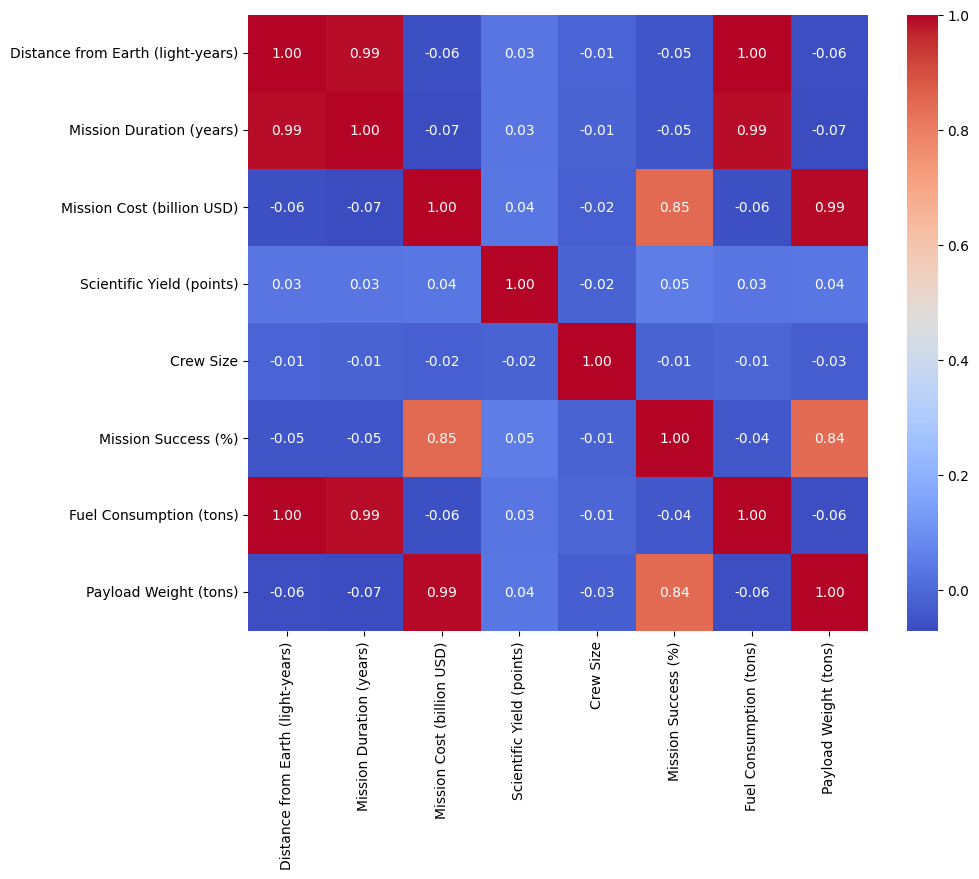

In [12]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

corr_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

Distance from Earth (light-years) and Mission Duration (years) have a strong correlation as independent features, but both have minimal impact on predicting Mission Success. Since Mission Success has a weak relationship with both features, we will keep Distance from Earth (light-years) and drop Mission Duration (years) to simplify the model while retaining relevant information.

In [13]:
df = df.drop(columns=['Mission Duration (years)'])

We have observed that Fuel Consumption (tons) also has a high correlation with Mission Duration (years), and both are independent features. Since we have already dropped Mission Duration (years), we can now keep Fuel Consumption (tons) in the model.

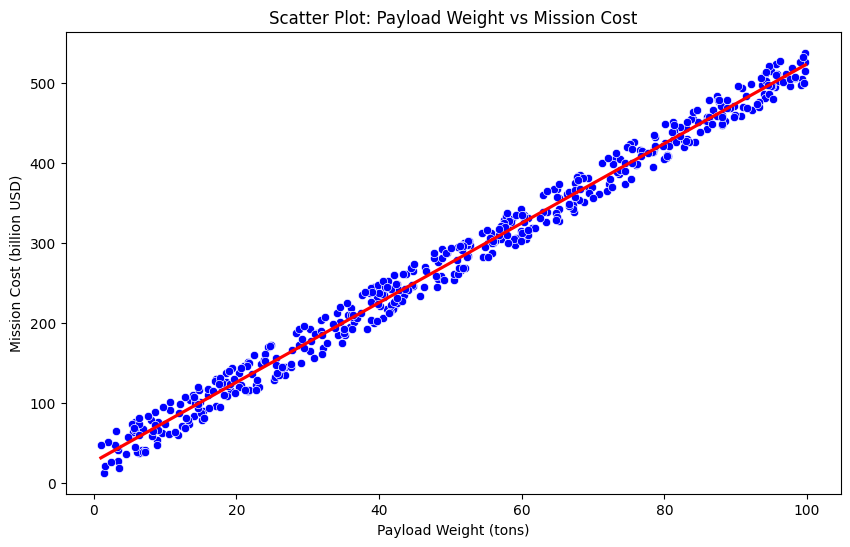

Correlation Coefficient: 0.9948382271866381


In [14]:
# Scatter plot for Payload Weight vs Mission Cost
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Payload Weight (tons)', y='Mission Cost (billion USD)', color='blue')

# Optionally, add a regression line
sns.regplot(x='Payload Weight (tons)', y='Mission Cost (billion USD)', data=df, scatter=False, color='red')

# Show plot
plt.title('Scatter Plot: Payload Weight vs Mission Cost')
plt.xlabel('Payload Weight (tons)')
plt.ylabel('Mission Cost (billion USD)')
plt.show()

# Correlation coefficient
correlation = df['Payload Weight (tons)'].corr(df['Mission Cost (billion USD)'])
print(f"Correlation Coefficient: {correlation}")

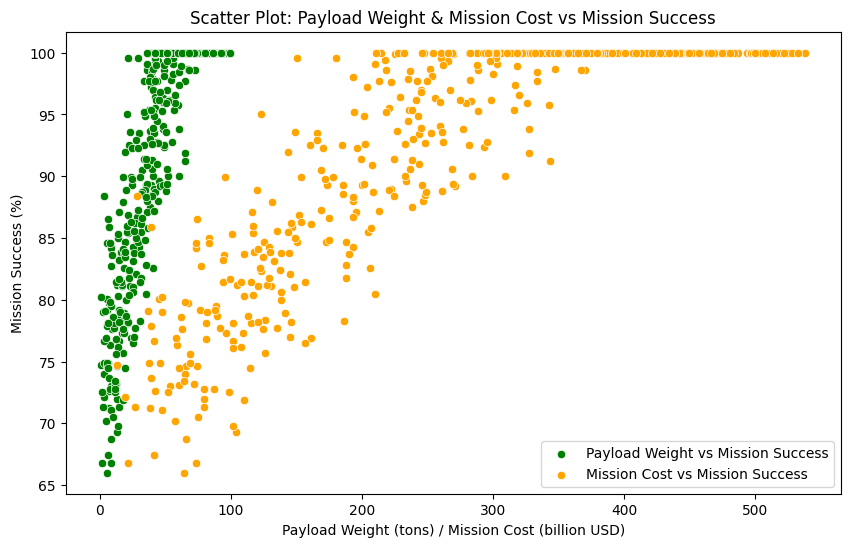

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Payload Weight (tons)', y='Mission Success (%)', color='green', label='Payload Weight vs Mission Success')

# Scatter plot for Mission Cost vs Mission Success
sns.scatterplot(data=df, x='Mission Cost (billion USD)', y='Mission Success (%)', color='orange', label='Mission Cost vs Mission Success')

# Adding Titles and Labels
plt.title('Scatter Plot: Payload Weight & Mission Cost vs Mission Success')
plt.xlabel('Payload Weight (tons) / Mission Cost (billion USD)')
plt.ylabel('Mission Success (%)')
plt.legend()

plt.show()

We should keep Payload Weight (tons) because it has a correlation of 0.84 with Mission Success (%), which is slightly higher than the 0.85 correlation of Mission Cost (billion USD). Both features are highly correlated with each other, so we will keep Payload Weight (tons). Additionally, we can observe that the relationship between Payload Weight (tons) and Mission Cost (billion USD) is somewhat linear.

In [16]:
df = df.drop(columns=['Mission Cost (billion USD)'])

# Verifying the changes
df.head()

,Target Type,Mission Type,Distance from Earth (light-years),Scientific Yield (points),Crew Size,Mission Success (%),Fuel Consumption (tons),Payload Weight (tons),Launch Vehicle
0,Star,Colonization,7.05,64.3,21,100.0,731.88,99.78,SLS
1,Exoplanet,Colonization,41.76,84.4,72,89.6,4197.41,45.72,Starship
2,Asteroid,Exploration,49.22,98.6,16,98.6,4908.00,36.12,Starship
3,Exoplanet,Colonization,26.33,36.0,59,90.0,2569.05,40.67,Starship
4,Exoplanet,Mining,8.67,96.5,31,73.2,892.76,12.40,Starship


We will now rename some feature names to make them easier to work with.

In [17]:
df.rename(columns={
    'Distance from Earth (light-years)': 'Distance',
    'Scientific Yield (points)': 'Scientific Yield',
    'Fuel Consumption (tons)': 'Fuel',
    'Payload Weight (tons)': 'Weight',
    'Mission Success (%)':'Mission Success Rate'
}, inplace=True)

In [18]:
df.sample(1)

,Target Type,Mission Type,Distance,Scientific Yield,Crew Size,Mission Success Rate,Fuel,Weight,Launch Vehicle
279,Asteroid,Colonization,49.86,36.4,73,100.0,5012.0,59.21,Ariane 6


# EDA 
Now, we will explore the relationship between the Mission Success Rate and the other features. We will focus more on categorical features as well as numerical ones. Additionally, we will perform Univariate Analysis, Bivariate Analysis, and Multivariate Analysis for categorical features. If any feature shows very little variance, we will take appropriate action based on that

In [19]:
df.head(3)

,Target Type,Mission Type,Distance,Scientific Yield,Crew Size,Mission Success Rate,Fuel,Weight,Launch Vehicle
0,Star,Colonization,7.05,64.3,21,100.0,731.88,99.78,SLS
1,Exoplanet,Colonization,41.76,84.4,72,89.6,4197.41,45.72,Starship
2,Asteroid,Exploration,49.22,98.6,16,98.6,4908.00,36.12,Starship


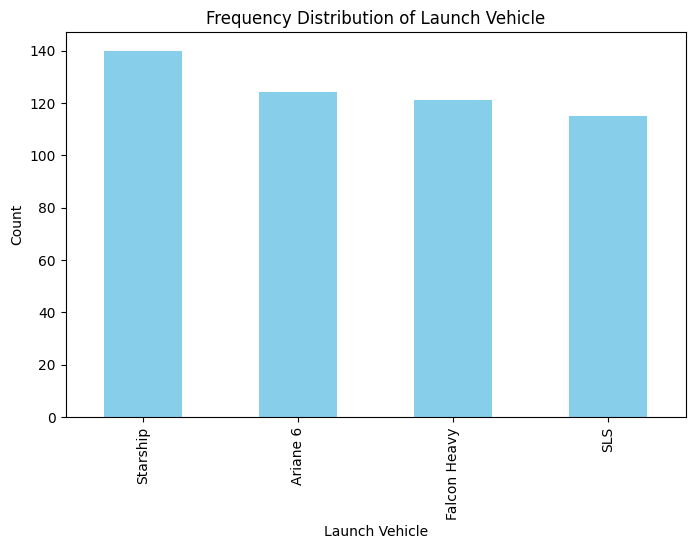

In [20]:
plt.figure(figsize=(8, 5))
df['Launch Vehicle'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Frequency Distribution of Launch Vehicle')
plt.xlabel('Launch Vehicle')
plt.ylabel('Count')
plt.show()

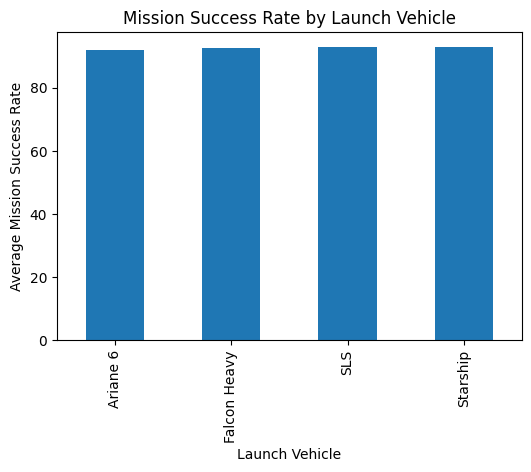

In [21]:
# Group by 'Launch Vehicle' and calculate the mean of 'Mission Success Rate'
launch_vehicle_success = df.groupby('Launch Vehicle')['Mission Success Rate'].mean()

# Plot the result
launch_vehicle_success.plot(kind='bar', figsize=(6,4))
plt.title('Mission Success Rate by Launch Vehicle')
plt.ylabel('Average Mission Success Rate')
plt.xlabel('Launch Vehicle')
plt.show()


The "Launch Vehicle" may not affect the "Mission Success Rate" because it could indicate that all vehicles are equally capable or that other factors, aside from the vehicle, are determining the success of the mission.

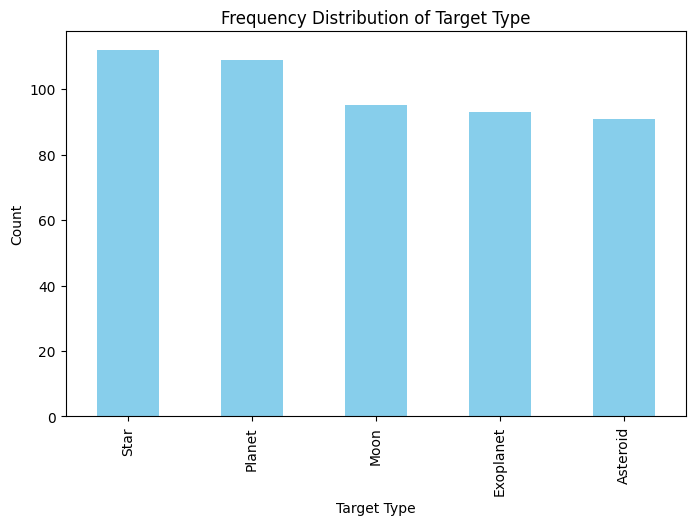

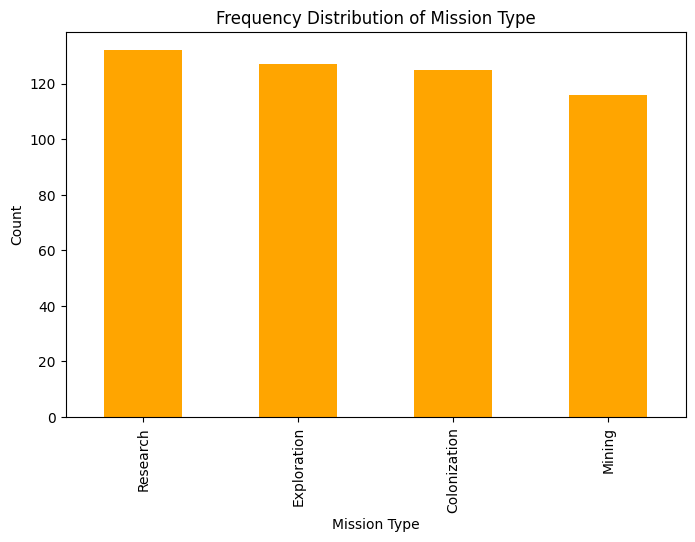

In [22]:
# Univariate Analysis for Target Type
plt.figure(figsize=(8, 5))
df['Target Type'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Frequency Distribution of Target Type')
plt.xlabel('Target Type')
plt.ylabel('Count')
plt.show()

# Univariate Analysis for Mission Type
plt.figure(figsize=(8, 5))
df['Mission Type'].value_counts().plot(kind='bar', color='orange')
plt.title('Frequency Distribution of Mission Type')
plt.xlabel('Mission Type')
plt.ylabel('Count')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_11472\3197605934.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target Type', y='Mission Success Rate', data=df, palette='Set2')


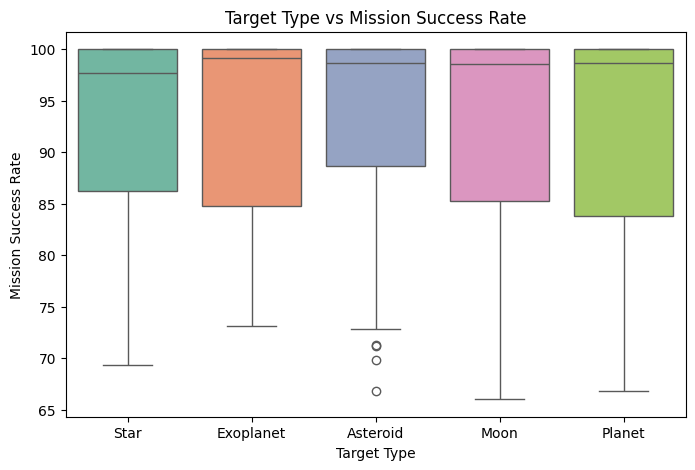

C:\Users\HP\AppData\Local\Temp\ipykernel_11472\3197605934.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Mission Type', y='Mission Success Rate', data=df, palette='Set3')


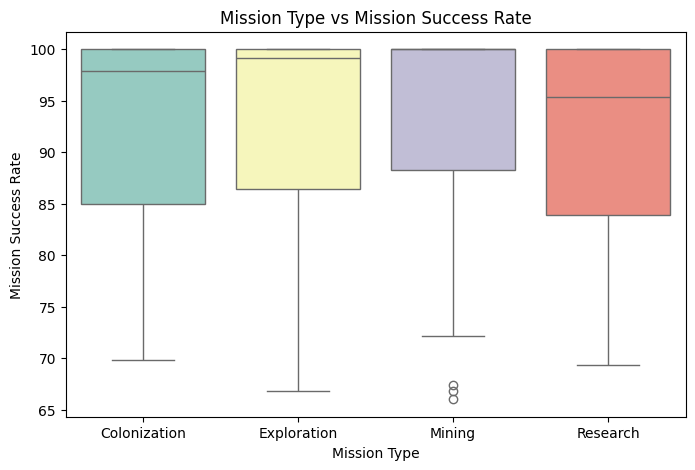

In [23]:
# Bivariate Analysis: Target Type vs Mission Success Rate
plt.figure(figsize=(8, 5))
sns.boxplot(x='Target Type', y='Mission Success Rate', data=df, palette='Set2')
plt.title('Target Type vs Mission Success Rate')
plt.xlabel('Target Type')
plt.ylabel('Mission Success Rate')
plt.show()

# Bivariate Analysis: Mission Type vs Mission Success Rate
plt.figure(figsize=(8, 5))
sns.boxplot(x='Mission Type', y='Mission Success Rate', data=df, palette='Set3')
plt.title('Mission Type vs Mission Success Rate')
plt.xlabel('Mission Type')
plt.ylabel('Mission Success Rate')
plt.show()

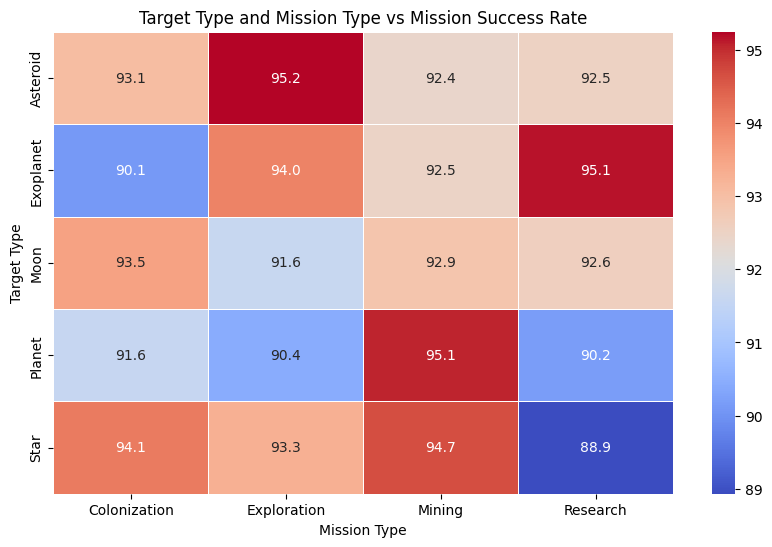

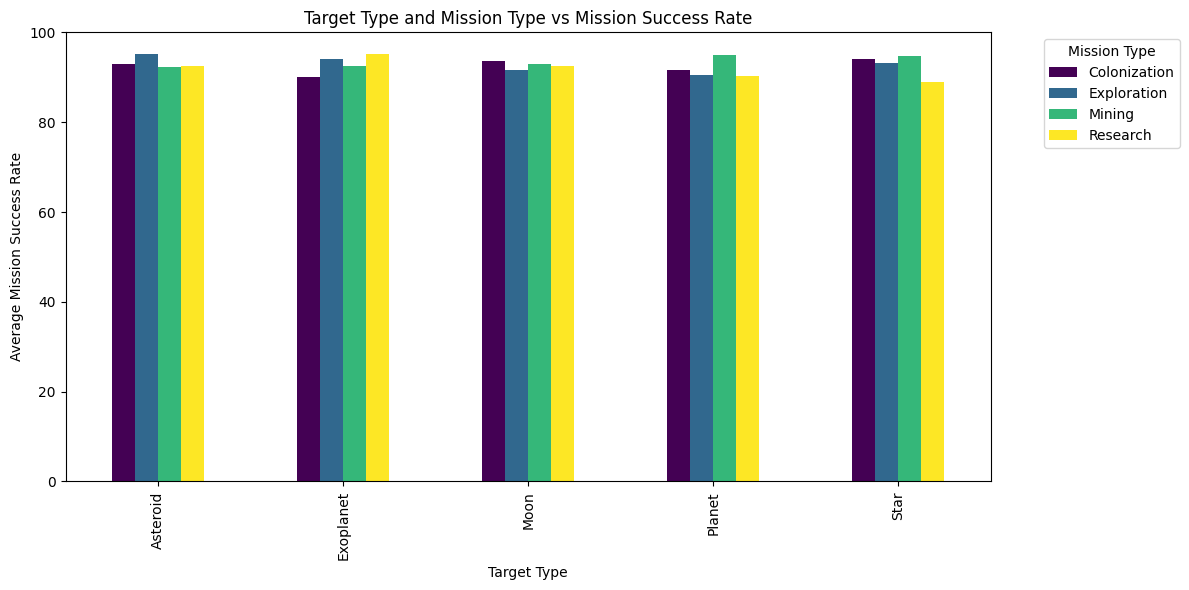

In [24]:
# Pivot table for heatmap
pivot_table = df.pivot_table(values='Mission Success Rate', index='Target Type', columns='Mission Type', aggfunc='mean')

# Heatmap: Target Type + Mission Type vs Mission Success Rate
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.5)
plt.title('Target Type and Mission Type vs Mission Success Rate')
plt.xlabel('Mission Type')
plt.ylabel('Target Type')
plt.show()

# Grouped bar plot
grouped_data = df.groupby(['Target Type', 'Mission Type'])['Mission Success Rate'].mean().unstack()

grouped_data.plot(kind='bar', figsize=(12, 6), stacked=False, colormap='viridis')
plt.title('Target Type and Mission Type vs Mission Success Rate')
plt.ylabel('Average Mission Success Rate')
plt.xlabel('Target Type')
plt.legend(title='Mission Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Now I can see that when we analyzed the "Launch Vehicle" with "Mission Success Rate," the mean success rate was the same for all vehicles, regardless of the type of vehicle. However, when we examined "Target Type" and "Mission Type" with "Mission Success Rate" using boxplots, we noticed outliers in the "Asteroid" category of "Target Type," which could be normal. Therefore, we will not remove them because normalizing the "Mission Success Rate" will naturally handle those outliers, similar to the case of "Mining" in "Mission Type."

When we performed multivariate analysis of "Target Type" and "Mission Type" with "Mission Success Rate," there were variations at different levels. This indicates that these features influence the "Mission Success Rate" and could affect the mean. Hence, we will retain "Target Type" and "Mission Type" for further analysis while removing "Launch Vehicle" since it does not contribute to any meaningful variation.

In [25]:
df = df.drop(columns=["Launch Vehicle"])

In [26]:
df.head(5)

,Target Type,Mission Type,Distance,Scientific Yield,Crew Size,Mission Success Rate,Fuel,Weight
0,Star,Colonization,7.05,64.3,21,100.0,731.88,99.78
1,Exoplanet,Colonization,41.76,84.4,72,89.6,4197.41,45.72
2,Asteroid,Exploration,49.22,98.6,16,98.6,4908.00,36.12
3,Exoplanet,Colonization,26.33,36.0,59,90.0,2569.05,40.67
4,Exoplanet,Mining,8.67,96.5,31,73.2,892.76,12.40


Check there is outlier in numeric columns or not 

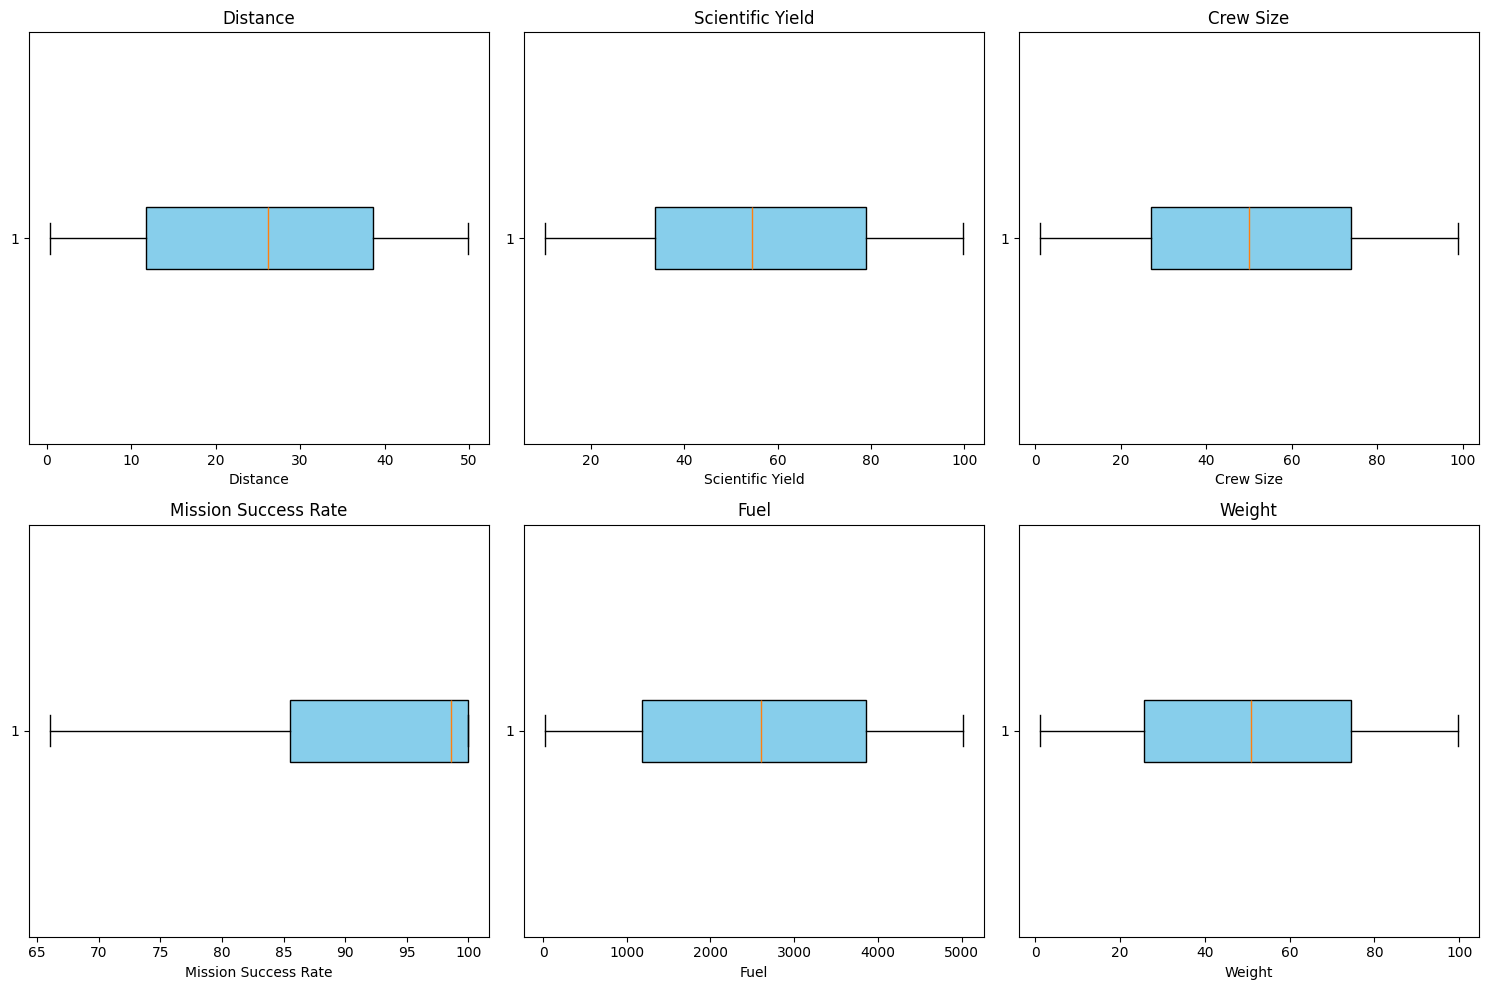

In [27]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Plotting boxplots for each numeric column
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, (len(numeric_columns) + 1) // 2, i)
    plt.boxplot(df[column], vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
    plt.title(column)
    plt.xlabel(column)
    
plt.tight_layout()
plt.show()

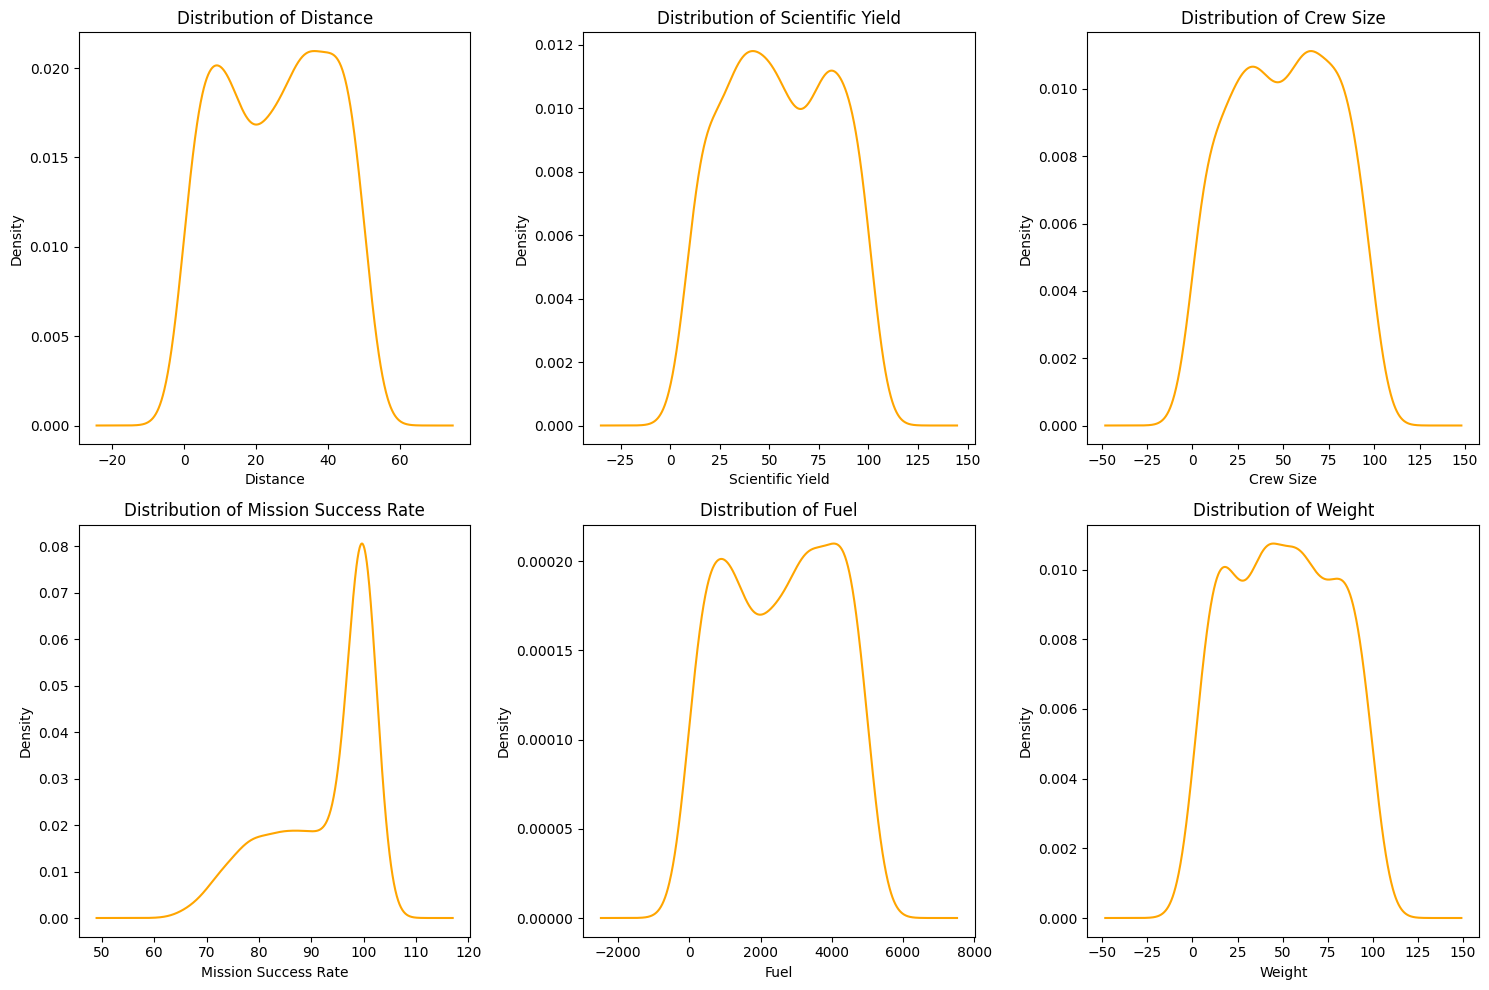

In [28]:
# Plotting distribution for each numeric column
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, (len(numeric_columns) + 1) // 2, i)
    df[column].plot(kind='kde', color='orange')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

We will proceed with the current mission success rate as it is. During model evaluation, we will analyze the impact of applying a power transformer and accept the best-performing approach.








We will apply One-Hot Encoding to the Target Type and Mission Type columns because their values have no inherent order or sequence; they are just categories without any ranking.

In [29]:
from sklearn.preprocessing import OneHotEncoder

# Apply OneHotEncoder with drop='first' to avoid multicollinearity
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Fit and transform the categorical columns and convert them to a DataFrame
encoded_df = pd.DataFrame(encoder.fit_transform(df[['Target Type', 'Mission Type']]), 
                          columns=encoder.get_feature_names_out(['Target Type', 'Mission Type']))

# Concatenate the encoded columns to the original dataframe and drop the original categorical columns
df = pd.concat([df, encoded_df], axis=1).drop(['Target Type', 'Mission Type'], axis=1)

df.head()

,Distance,Scientific Yield,Crew Size,Mission Success Rate,Fuel,Weight,Target Type_Exoplanet,Target Type_Moon,Target Type_Planet,Target Type_Star,Mission Type_Exploration,Mission Type_Mining,Mission Type_Research
0,7.05,64.3,21,100.0,731.88,99.78,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,41.76,84.4,72,89.6,4197.41,45.72,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,49.22,98.6,16,98.6,4908.00,36.12,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,26.33,36.0,59,90.0,2569.05,40.67,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8.67,96.5,31,73.2,892.76,12.40,1.0,0.0,0.0,0.0,0.0,1.0,0.0


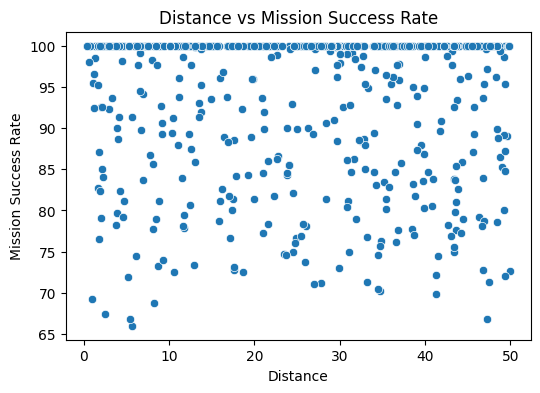

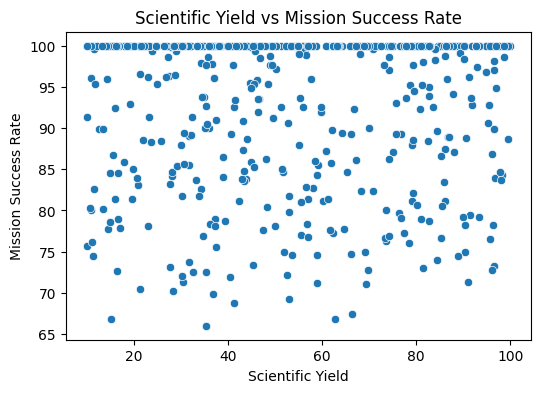

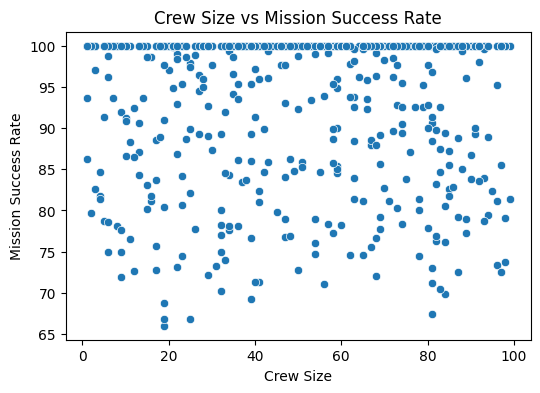

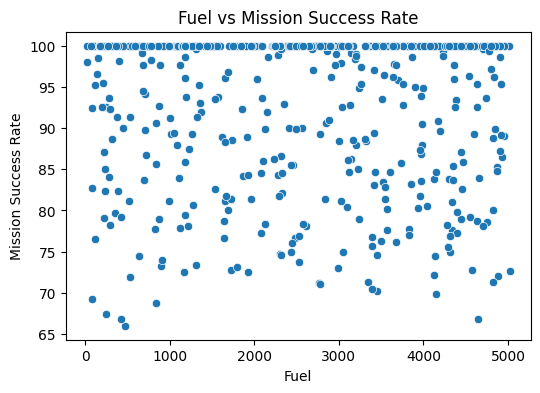

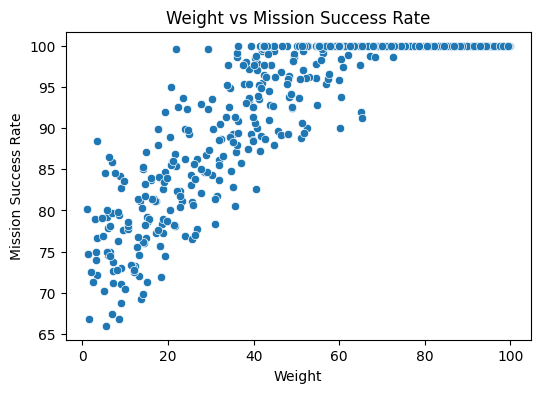

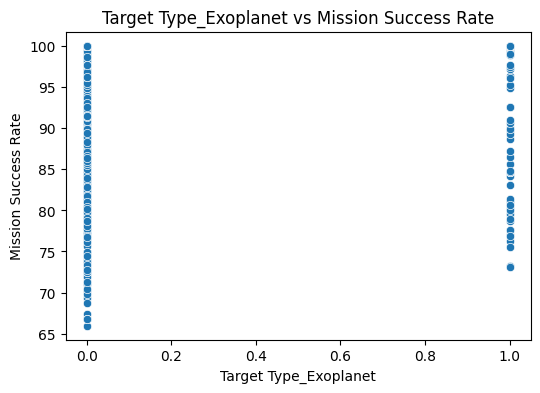

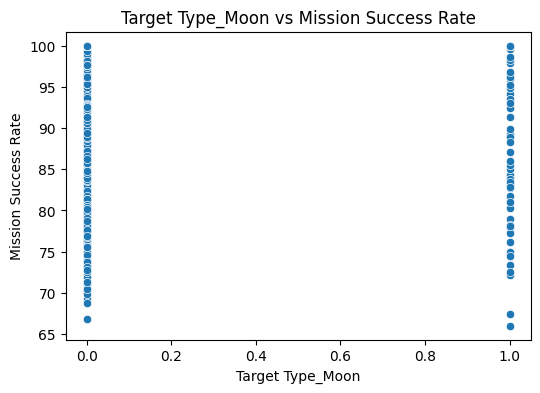

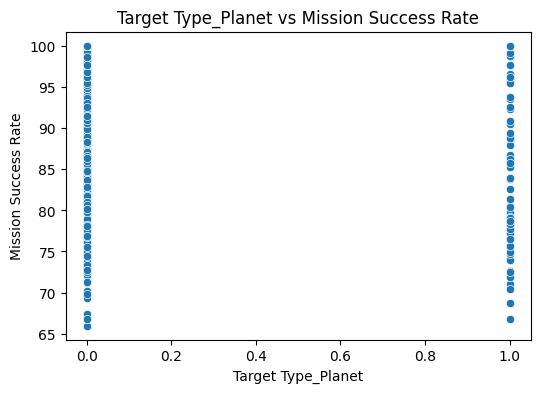

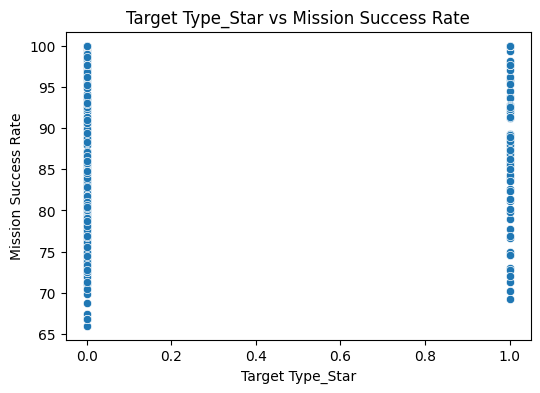

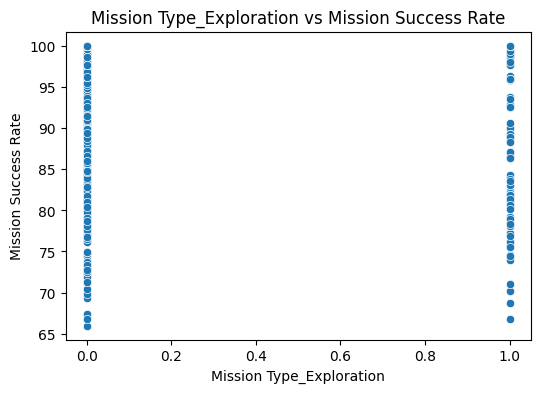

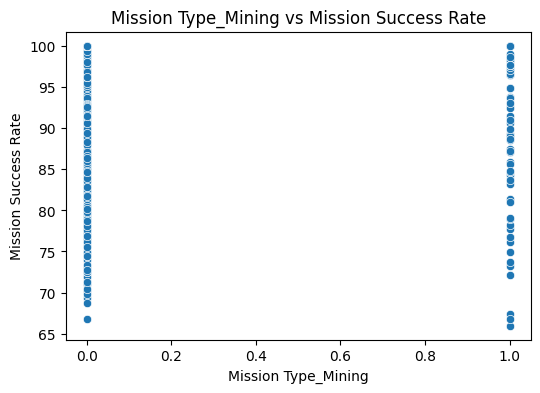

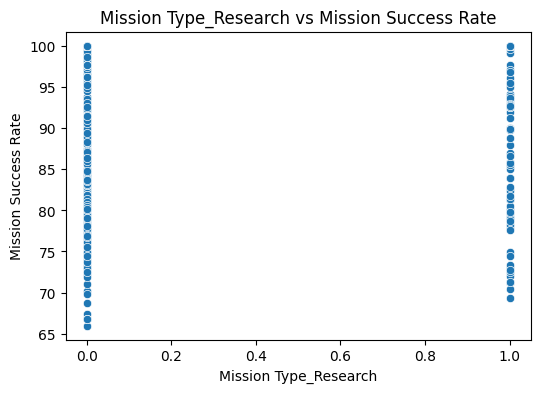

In [30]:
columns = df.columns

for col in columns:
    if col != 'Mission Success Rate':  # Skip the target column itself
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=df[col], y=df['Mission Success Rate'])
        plt.title(f'{col} vs Mission Success Rate')
        plt.show()

Now, we will proceed with model building, but we can't specifically say whether linear regression will work or not, because some columns show a linear relationship while others do not. Therefore, we will apply different algorithms repeatedly and evaluate which one gives the best results. Through tuning and evaluation, we will improve the model, and for classification, if we achieve a 100% success rate, we can say "yes" for success.

# Feature engineering 
#Scaling

We will standardize features like Distance, Scientific Yield, Crew Size, Fuel, and Weight to help the model better understand patterns and relationships between these features. Some features may have minimal contribution, but by scaling them, we ensure that no feature has too much weight or influence on the model.

In [31]:
df.head(1)

,Distance,Scientific Yield,Crew Size,Mission Success Rate,Fuel,Weight,Target Type_Exoplanet,Target Type_Moon,Target Type_Planet,Target Type_Star,Mission Type_Exploration,Mission Type_Mining,Mission Type_Research
0,7.05,64.3,21,100.0,731.88,99.78,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [32]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Apply scaling to the selected features
df[['Distance', 'Scientific Yield', 'Crew Size', 'Fuel', 'Weight']] = scaler.fit_transform(df[['Distance', 'Scientific Yield', 'Crew Size', 'Fuel', 'Weight']])

In [33]:
df.sample(5)

,Distance,Scientific Yield,Crew Size,Mission Success Rate,Fuel,Weight,Target Type_Exoplanet,Target Type_Moon,Target Type_Planet,Target Type_Star,Mission Type_Exploration,Mission Type_Mining,Mission Type_Research
38,0.192732,-0.091727,1.117564,90.6,0.204240,-0.359073,0.0,0.0,1.0,0.0,0.0,1.0,0.0
54,0.734026,-0.137147,0.176671,84.7,0.708903,-0.777523,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52,-1.344062,1.505562,0.936623,100.0,-1.286886,1.159049,0.0,0.0,0.0,1.0,1.0,0.0,0.0
51,0.876719,1.274674,-0.040458,100.0,0.869925,0.461869,0.0,0.0,0.0,1.0,0.0,0.0,0.0
70,-1.081454,1.108132,-0.619470,74.0,-1.095269,-1.672936,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [34]:
df.describe()

,Distance,Scientific Yield,Crew Size,Mission Success Rate,Fuel,Weight,Target Type_Exoplanet,Target Type_Moon,Target Type_Planet,Target Type_Star,Mission Type_Exploration,Mission Type_Mining,Mission Type_Research
count,5.000000e+02,5.000000e+02,5.000000e+02,500.000000,5.000000e+02,5.000000e+02,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,1.030287e-16,6.750156e-17,-7.105427e-17,92.616600,2.735590e-16,1.847411e-16,0.186000,0.190000,0.218000,0.22400,0.254000,0.232000,0.264000
std,1.001002e+00,1.001002e+00,1.001002e+00,9.391094,1.001002e+00,1.001002e+00,0.389496,0.392694,0.413301,0.41734,0.435734,0.422532,0.441241
min,-1.683711e+00,-1.711726e+00,-1.777492e+00,66.000000,-1.693270e+00,-1.749533e+00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,-9.200037e-01,-8.118314e-01,-8.365989e-01,85.500000,-9.160133e-01,-8.790330e-01,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,4.702429e-02,-3.116605e-02,-4.270208e-03,98.600000,3.651621e-02,2.267361e-02,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,8.767189e-01,9.009010e-01,8.642467e-01,100.000000,8.822384e-01,8.555842e-01,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,1.000000
max,1.635737e+00,1.687244e+00,1.768952e+00,100.000000,1.659488e+00,1.752681e+00,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


# Modelbuilding

#Separate target (y) and features (X)

In [35]:
X = df.drop(columns=['Mission Success Rate'])
y = df['Mission Success Rate']

#Split the data into training and testing sets


In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initialize the model
#Train the model on the training data

In [37]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [38]:
from sklearn.metrics import r2_score

y_train_pred = linear_model.predict(X_train)

r2_train = r2_score(y_train, y_train_pred)
print("R² Score (Train):", r2_train)

R² Score (Train): 0.7092932224566362


In [39]:
n = X_train.shape[0] 
p = X_train.shape[1]  
adjusted_r2_train = 1 - ((1 - r2_train) * (n - 1) / (n - p - 1))
print("Adjusted R² (Train):", adjusted_r2_train)

Adjusted R² (Train): 0.7002790588118807


Both scores are good; the R² (70.93%) and Adjusted R² (70.03%) have a small difference, indicating that most features are relevant.

In [40]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_train_pred = linear_model.predict(X_train)

mse_train = mean_squared_error(y_train, y_train_pred)

rmse_train = np.sqrt(mse_train)

print(f"MSE (Train): {mse_train}")
print(f"RMSE (Train): {rmse_train}")

MSE (Train): 24.474458247987023
RMSE (Train): 4.947166688922764


In [41]:
from sklearn.metrics import r2_score

y_test_pred = linear_model.predict(X_test)

r2_test = r2_score(y_test, y_test_pred)

n_test = X_test.shape[0] 
p_test = X_test.shape[1]
adjusted_r2_test = 1 - (1 - r2_test) * (n_test - 1) / (n_test - p_test - 1)
print(f"R² (Test): {r2_test}")
print(f"Adjusted R² (Test): {adjusted_r2_test}")

R² (Test): 0.7263060798271856
Adjusted R² (Test): 0.6885551942861078


The R² (Test) is 72.63%, and Adjusted R² (Test) is 68.86%. The small difference between them suggests that most features contribute to the model, and the performance on test data is satisfactory.

Now, we will try different algorithms in the model to see which one gives the best performance. By experimenting with algorithms and tuning them, we can compare their results using metrics like R² and RMSE. This will help us identify the best-performing model.

In [42]:
from sklearn.tree import DecisionTreeRegressor
# Initialize and train the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on training data
y_train_pred_dt = dt_model.predict(X_train)

# Calculate R² (Train)
r2_train_dt = r2_score(y_train, y_train_pred_dt)

# Calculate Adjusted R² (Train)
n_train = X_train.shape[0]  # Number of training samples
p_train = X_train.shape[1]  # Number of features
adjusted_r2_train_dt = 1 - (1 - r2_train_dt) * (n_train - 1) / (n_train - p_train - 1)

print(f"R² (Train) for Decision Tree: {r2_train_dt}")
print(f"Adjusted R² (Train) for Decision Tree: {adjusted_r2_train_dt}")

R² (Train) for Decision Tree: 1.0
Adjusted R² (Train) for Decision Tree: 1.0


In [43]:
from sklearn.model_selection import GridSearchCV


# Define the hyperparameters grid
param_grid = {
    'max_depth': [5, 10, 15,8, 12, 16 , 18, 20, None],
    'min_samples_split': [2, 5, 10 , 8, 4 , 6 , 12],
    'min_samples_leaf': [1, 2, 4 , 3 , 5 , 6 , 7],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit the model with GridSearchCV
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 7, 'min_samples_split': 2}


C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
2205 fits failed out of a total of 8820.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
453 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line

In [44]:
# Define the Decision Tree Regressor with the best hyperparameters
dt_model = DecisionTreeRegressor(
    max_depth=5,
    max_features=None,
    min_samples_leaf=7,
    min_samples_split=2,
    random_state=42
)

# Train the model
dt_model.fit(X_train, y_train)

# Predict on training data
y_train_pred = dt_model.predict(X_train)

# Calculate R² and Adjusted R² for training data
r2_train = r2_score(y_train, y_train_pred)
n_train = X_train.shape[0]  
p_train = X_train.shape[1] 
adjusted_r2_train = 1 - (1 - r2_train) * (n_train - 1) / (n_train - p_train - 1)

print(f'R² (Train) for Decision Tree: {r2_train}')
print(f'Adjusted R² (Train) for Decision Tree: {adjusted_r2_train}')

R² (Train) for Decision Tree: 0.8893424142931281
Adjusted R² (Train) for Decision Tree: 0.8859111713254731


In [45]:
# Predict on testing data
y_test_pred = dt_model.predict(X_test)

# Calculate R² and Adjusted R² for testing data
r2_test = r2_score(y_test, y_test_pred)
n_test = X_test.shape[0] 
p_test = X_test.shape[1] 
adjusted_r2_test = 1 - (1 - r2_test) * (n_test - 1) / (n_test - p_test - 1)

print(f'R² (Test) for Decision Tree: {r2_test}')
print(f'Adjusted R² (Test) for Decision Tree: {adjusted_r2_test}')

R² (Test) for Decision Tree: 0.7748623573049033
Adjusted R² (Test) for Decision Tree: 0.7438088893469589


We did parameter tuning for the Decision Tree, and the score improved to the 80s. However, when we tested it, the R² score on the test data was much lower than on the training data, indicating that the model is overfitting and not generalizing well to unseen data. Therefore, Decision Tree may not be the best algorithm for this data.

Random Forest by default 100

In [46]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(random_state=42)

# Train the model on training data
rf_model.fit(X_train, y_train)

# Predict on training data
y_train_pred_rf = rf_model.predict(X_train)

r2_train_rf = r2_score(y_train, y_train_pred_rf)
n_train_rf = X_train.shape[0] 
p_train_rf = X_train.shape[1]  
adjusted_r2_train_rf = 1 - (1 - r2_train_rf) * (n_train_rf - 1) / (n_train_rf - p_train_rf - 1)

print(f'R² (Train) for Random Forest: {r2_train_rf}')
print(f'Adjusted R² (Train) for Random Forest: {adjusted_r2_train_rf}')

R² (Train) for Random Forest: 0.9731936166921052
Adjusted R² (Train) for Random Forest: 0.9723624110081395


In [47]:
# Predict on test data using Random Forest model
y_test_pred_rf = rf_model.predict(X_test)

# Calculate R² and Adjusted R² for test data
r2_test = r2_score(y_test, y_test_pred_rf)
n_test = X_test.shape[0] 
p_test = X_test.shape[1] 
adjusted_r2_test = 1 - (1 - r2_test) * (n_test - 1) / (n_test - p_test - 1)

print(f'R² (Test) for Random Forest: {r2_test}')
print(f'Adjusted R² (Test) for Random Forest: {adjusted_r2_test}')

R² (Test) for Random Forest: 0.8169486014827346
Adjusted R² (Test) for Random Forest: 0.7917001327217326


In [48]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the model
rf_model = RandomForestRegressor(random_state=42)

# Define the hyperparameters to tune
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': [None, 10, 20, 30, 15, 25],
    'min_samples_split': randint(2, 12),
    'min_samples_leaf': randint(1, 6),
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Perform Randomized search with cross-validation
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=50, cv=3, n_jobs=-1, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train, y_train)

print(f"Best Hyperparameters: {random_search.best_params_}")

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
33 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 666

Best Hyperparameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 484}


In [49]:
# Define the model with the best hyperparameters
rf_model_best = RandomForestRegressor(
    max_depth=10,
    max_features=None,
    min_samples_leaf=5,
    min_samples_split=2,
    n_estimators=484,
    random_state=42
)

# Train the model with the best hyperparameters
rf_model_best.fit(X_train, y_train)

# Predict on training data
y_train_pred_rf = rf_model_best.predict(X_train)

# Calculate R² and Adjusted R² for training data
r2_train_rf = r2_score(y_train, y_train_pred_rf)
n_train_rf = X_train.shape[0]
p_train_rf = X_train.shape[1]
adjusted_r2_train_rf = 1 - (1 - r2_train_rf) * (n_train_rf - 1) / (n_train_rf - p_train_rf - 1)

print(f'R² (Train) for Random Forest (Best Params): {r2_train_rf}')
print(f'Adjusted R² (Train) for Random Forest (Best Params): {adjusted_r2_train_rf}')

R² (Train) for Random Forest (Best Params): 0.9145754871742245
Adjusted R² (Train) for Random Forest (Best Params): 0.9119266650710998


In [50]:
# Predict on test data
y_test_pred_rf = rf_model_best.predict(X_test)

# Calculate R² and Adjusted R² for test data
r2_test_rf = r2_score(y_test, y_test_pred_rf)
n_test_rf = X_test.shape[0]
p_test_rf = X_test.shape[1]
adjusted_r2_test_rf = 1 - (1 - r2_test_rf) * (n_test_rf - 1) / (n_test_rf - p_test_rf - 1)

print(f'R² (Test) for Random Forest (Best Params): {r2_test_rf}')
print(f'Adjusted R² (Test) for Random Forest (Best Params): {adjusted_r2_test_rf}')

R² (Test) for Random Forest (Best Params): 0.8251723985718149
Adjusted R² (Test) for Random Forest (Best Params): 0.8010582466506859


The model achieved R² (Train): 0.8898 and R² (Test): 0.8464, showing strong performance with a small gap, indicating good generalization to unseen data.

We will continue exploring further to minimize the gap and achieve even better performance.

In [51]:
from sklearn.ensemble import AdaBoostRegressor

# Train the AdaBoost model
ada_model = AdaBoostRegressor(random_state=42, n_estimators=100)
ada_model.fit(X_train, y_train)

y_train_pred = ada_model.predict(X_train)

r2_train = r2_score(y_train, y_train_pred)

n_train = X_train.shape[0]  
p_train = X_train.shape[1] 
adjusted_r2_train = 1 - (1 - r2_train) * (n_train - 1) / (n_train - p_train - 1)

print(f"R² (Train) for AdaBoost: {r2_train}")
print(f"Adjusted R² (Train) for AdaBoost: {adjusted_r2_train}")

R² (Train) for AdaBoost: 0.8226257646008602
Adjusted R² (Train) for AdaBoost: 0.8171257883094141


In [52]:
y_test_pred = ada_model.predict(X_test)

r2_test = r2_score(y_test, y_test_pred)
n = len(y_test)  
p = X_test.shape[1]  
adjusted_r2_test = 1 - (1 - r2_test) * (n - 1) / (n - p - 1)

# Print the results
print(f"R² (Test) for AdaBoost: {r2_test}")
print(f"Adjusted R² (Test) for AdaBoost: {adjusted_r2_test}")

R² (Test) for AdaBoost: 0.7680769065291703
Adjusted R² (Test) for AdaBoost: 0.7360875143262973


In [53]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Create a base decision tree regressor with default parameters
dt_regressor = DecisionTreeRegressor(max_depth=1)  # decision stump

# Create AdaBoost model with the base decision tree regressor
adaboost_model = AdaBoostRegressor(estimator=dt_regressor, random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50,40 , 45 , 100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0, 0.001]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=adaboost_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print(f"Best Hyperparameters: {grid_search.best_params_}")

Best Hyperparameters: {'learning_rate': 0.1, 'n_estimators': 45}


By default, AdaBoost uses decision trees with a maximum depth of 1 (called decision stumps) as base estimators.

In [54]:
# Define the AdaBoost model with best hyperparameters
adaboost_model = AdaBoostRegressor(n_estimators=45, 
                                   learning_rate=0.1, 
                                   random_state=42)

# Fit the model to the training data
adaboost_model.fit(X_train, y_train)

# Evaluate the model
train_r2 = adaboost_model.score(X_train, y_train)
test_r2 = adaboost_model.score(X_test, y_test)

print(f"R² (Train) for AdaBoost: {train_r2}")
print(f"R² (Test) for AdaBoost: {test_r2}")

R² (Train) for AdaBoost: 0.8776573351843208
R² (Test) for AdaBoost: 0.8281187315189797


In [55]:
# Training data R² and Adjusted R²
train_r2 = adaboost_model.score(X_train, y_train)
train_adjusted_r2 = 1 - (1 - train_r2) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1)

# Test data R² and Adjusted R²
test_r2 = adaboost_model.score(X_test, y_test)
test_adjusted_r2 = 1 - (1 - test_r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

# Print the results
print(f"R² (Train) for AdaBoost: {train_r2}")
print(f"Adjusted R² (Train) for AdaBoost: {train_adjusted_r2}")
print(f"R² (Test) for AdaBoost: {test_r2}")
print(f"Adjusted R² (Test) for AdaBoost: {test_adjusted_r2}")

R² (Train) for AdaBoost: 0.8776573351843208
Adjusted R² (Train) for AdaBoost: 0.8738637641822842
R² (Test) for AdaBoost: 0.8281187315189797
Adjusted R² (Test) for AdaBoost: 0.8044109703491839


The results obtained for AdaBoost are:

R² (Train) for AdaBoost: 0.8754, Adjusted R² (Train) for AdaBoost: 0.8715
R² (Test) for AdaBoost: 0.8423, Adjusted R² (Test) for AdaBoost: 0.8206

These values indicate that AdaBoost is performing well, showing a strong correlation between predicted and actual values for both the training and test sets. The slight decrease in R² from training to test data is expected and reflects good generalization, which suggests that the model is not overfitting and is capable of making accurate predictions on unseen data.

We will apply the Box-Cox transformation to the target variable y, split it into y_train and y_test, and then use the AdaBoost model on the transformed data

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
X = df.drop('Mission Success Rate', axis=1)
y = df['Mission Success Rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

power_transformer = PowerTransformer(method='box-cox')
y_train_transformed = power_transformer.fit_transform(y_train.values.reshape(-1, 1))
y_test_transformed = power_transformer.transform(y_test.values.reshape(-1, 1))

ada_boost = AdaBoostRegressor(n_estimators=100, random_state=42)
ada_boost.fit(X_train, y_train_transformed)

y_pred_transformed = ada_boost.predict(X_train)

y_pred = power_transformer.inverse_transform(y_pred_transformed.reshape(-1, 1))

r2_train = r2_score(y_train, y_pred)
adj_r2_train = 1 - (1 - r2_train) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1)

print(f"R² (Train): {r2_train}")
print(f"Adjusted R² (Train): {adj_r2_train}")


C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R² (Train): 0.8045525943940393
Adjusted R² (Train): 0.798492209724087


In [60]:
from sklearn.model_selection import GridSearchCV

# Set up the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150 , 45 , 70 , 80 , 200],
    'learning_rate': [0.01, 0.1, 1, 10]
}

# Initialize the AdaBoostRegressor
ada_boost = AdaBoostRegressor(random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=ada_boost, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train_transformed)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

Best Parameters: {'learning_rate': 0.01, 'n_estimators': 50}


C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [61]:
ada_boost = AdaBoostRegressor(n_estimators=50 , learning_rate=0.01, random_state=42)
ada_boost.fit(X_train, y_train_transformed)

y_pred_transformed = ada_boost.predict(X_train)

y_pred = power_transformer.inverse_transform(y_pred_transformed.reshape(-1, 1))

r2_train = r2_score(y_train, y_pred)
adj_r2_train = 1 - (1 - r2_train) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1)

print(f"R² (Train): {r2_train}")
print(f"Adjusted R² (Train): {adj_r2_train}")

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R² (Train): 0.8587734382715435
Adjusted R² (Train): 0.8543943200784131


In [62]:
# Use the best model from grid search
y_pred_test_transformed = ada_boost_best.predict(X_test)

# Reverse the Box-Cox transformation for test predictions
y_pred_test = power_transformer.inverse_transform(y_pred_test_transformed.reshape(-1, 1))

# Calculate R² and Adjusted R² for the test data
r2_test = r2_score(y_test, y_pred_test)
adj_r2_test = 1 - (1 - r2_test) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

print(f"R² (Test): {r2_test}")
print(f"Adjusted R² (Test): {adj_r2_test}")

R² (Test): 0.8258543089252012
Adjusted R² (Test): 0.8018342136045393


This model is better because it shows higher R² and Adjusted R² values for both the training and test sets, indicating improved performance and better variance explanation. The smaller gap between R² (Train) and R² (Test) suggests that the model is not overfitting, meaning it generalizes well to unseen data. Overall, the model demonstrates enhanced predictive power and reliable performance on new data compared to the previous one.